# Installing and Importing TensorFlow v1

In [1]:
# Import the TensorFlow and output the verion

!pip install tensorflow==1.14.0
import tensorflow as tf
print("\n\nTensorFlow version:", tf.__version__)

/home/caesar/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/caesar/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/caesar/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/caesar/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty



TensorFlow version: 1.14.0


/home/caesar/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/caesar/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/caesar/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/caesar/anaconda3/lib/python3.7/site-packages/tensorboar

# Creating Your First Graph and Running It in a Session

In [2]:
# The following code creates a computation graph which can be used to do the computation later on

x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y + 2

In [3]:
# The following code creates a session, initilizes the variables, and evaluates f then closes the session.

sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)
sess.close()

42


In [4]:
# Having to repeat sess.run() all the time is a bit cumbersome, so there is a better way to do this:

with tf.Session() as sess:
  x.initializer.run()         # it is similat to tf.get_default_session().run(x.initializer)
  y.initializer.run()         # it is similar to tf.get_deafult_session().run(y.initializer)
  result = f.eval()           # it is similar to tf.get_default_session().run(f)
  print(result)

# Inside the with block, the session is set as the default session

42


In [5]:
# Instead of manually running the initializer for every single variable, you can use the 
# global_variables_initializer() function that creates a node in the graph that will initialize all the variables 
# when it runs

init = tf.global_variables_initializer()      # prepare an init node

with tf.Session() as sess:
  init.run() # actually initializes all the variables
  result = f.eval
  print(result)

<bound method Tensor.eval of <tf.Tensor 'add_1:0' shape=() dtype=int32>>


In [6]:
# We can also use and InteractiveSession which differs from a regular Session in the fact that when an 
# InteractiveSession is created it automatically sets itself as the default session, so you don't need a with 
# block.
sess = tf.InteractiveSession()
init.run()
result = f.eval()
print(result)
sess.close()

42


**NOTE:** A TensorFlow program is typically split into two parts: the first part builds a computation graph (this is called the *construction* phase) that represents the ML model and the computations required to train it, an the second part runs it (this is called the *execution* phase) that generally runs a loop that evaluates a training step repeatedly, gradually improving the model parameters.

# Managing Graphs

In [7]:
# Any node you create is automatically added to the default graph:

x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

In [8]:
# In most cases it is fine, but sometimes you may want to manage multiple independent graphs. You can do this by 
# creating a new Graph and temporarily making it the default graph inside a with block:

graph = tf.Graph()
with graph.as_default():
  x2 = tf.Variable(2)

x2.graph is graph

True

In [9]:
x2.graph is tf.get_default_graph()

False

# Lifecycle of a Node Value

In [10]:
# A variable starts its life when its initializer is run, and it ends when the session is closed. 
# When you evaluate a graph, TensorFlow automatically determines the set of nodes that it depends on and it 
# evaluates these nodes first. For example consider the following code:

w = tf.constant(3)
x = w + 2
y = x + 5
z = x + 3

with tf.Session() as sess:
  print("y:", y.eval())
  print("z:", z.eval())

# This starts a session adn runs the graph to evaluate y: TensorFlow automatically detects that y depends on x, 
# which depends on w, so it first evaluates w, then x, then y, and returns the value of y. Finally, the code runs 
# the graph to evaluate z. Once again, TensorFlow detects that it must first evaluate w and x. It will not reuse 
# the result of the previous evaluations of w and x. The code evaluates w and x twice.

y: 10
z: 8


In [11]:
# If you want to evaluate y and z efficiently, without evaluating w and x twice, you must ask TensorFlow to 
# evaluate both y and x in just one graph run:

with tf.Session() as sess:
  y_val, z_val = sess.run([y, z])
  print("y:", y_val)
  print("z:", z_val)


y: 10
z: 8


# Linear Regression with TensorFlow

In [12]:
# TensorFlow operations are called ops for short. Constants and variables take no input, so they are called 
# source ops. The inputs and outputs are multidimensional arrays, called tensors (hence the name tensor flow).

import numpy as np
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

with tf.Session() as sess:
  theta_value = theta.eval()

# Implementing Gradient Descnet

### Manually Computing the gradients:

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

import datetime
a = datetime.datetime.now()
with tf.Session() as sess:
  sess.run(init)

  for epoch in range(n_epochs):
    if epoch % 100 == 0:
      print("Epoch", epoch, "MSE =", mse.eval())
    sess.run(training_op)
  
  best_theta = theta.eval()
b = datetime.datetime.now()
c = b - a
print(c.microseconds)

# The random_uniform() function creates a node in the graph that will generate a tensor containing random values,
# given its shape and value range. The assign() funnction creates a node that will assign a new value to a 
# variable.

Epoch 0 MSE = 12.012333
Epoch 100 MSE = 0.86637396
Epoch 200 MSE = 0.65275073
Epoch 300 MSE = 0.6161807
Epoch 400 MSE = 0.5920384
Epoch 500 MSE = 0.57444745
Epoch 600 MSE = 0.5615484
Epoch 700 MSE = 0.55206585
Epoch 800 MSE = 0.54507715
Epoch 900 MSE = 0.53991216
518388


### Using autodiff:

In [14]:
# TensorFlow's autodiff feature can automatically and efficiently compute the gradeints for you.
tf.reset_default_graph()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = tf.gradients(mse, [theta])[0]
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

import datetime
a = datetime.datetime.now()
with tf.Session() as sess:
  sess.run(init)

  for epoch in range(n_epochs):
    if epoch % 100 == 0:
      print("Epoch", epoch, "MSE =", mse.eval())
    sess.run(training_op)
  
  best_theta = theta.eval()
b = datetime.datetime.now()
c = b - a
print(c.microseconds)

Epoch 0 MSE = 2.8267274
Epoch 100 MSE = 0.81548864
Epoch 200 MSE = 0.7099729
Epoch 300 MSE = 0.65776706
Epoch 400 MSE = 0.6207093
Epoch 500 MSE = 0.59397864
Epoch 600 MSE = 0.5746767
Epoch 700 MSE = 0.56073546
Epoch 800 MSE = 0.5506641
Epoch 900 MSE = 0.5433867
515099


## Using an Optimizer:

In [15]:
# TensorFlow provides a number of optimizers to simplify the code. You just need to select the one.

tf.reset_default_graph()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

import datetime
a = datetime.datetime.now()
with tf.Session() as sess:
  sess.run(init)

  for epoch in range(n_epochs):
    if epoch % 100 == 0:
      print("Epoch", epoch, "MSE =", mse.eval())
    sess.run(training_op)
  
  best_theta = theta.eval()
b = datetime.datetime.now()
c = b - a
print(c.microseconds)

Epoch 0 MSE = 8.347848
Epoch 100 MSE = 0.7398799
Epoch 200 MSE = 0.5951053
Epoch 300 MSE = 0.5768822
Epoch 400 MSE = 0.5652666
Epoch 500 MSE = 0.55645216
Epoch 600 MSE = 0.54966515
Epoch 700 MSE = 0.54440844
Epoch 800 MSE = 0.54031545
Epoch 900 MSE = 0.5371121
457194


# Feeding Data to the Training Algorithm

In [16]:
# To pass the training data to TensorFlow during training, we use placeholder nodes which don't actually perform 
# any computation but just output the data you tell them to output at runtime. For example, the following code 
# creates a placeholder node A and also a node B. When we evaluate B, we pass a feed_dict to the eval() method 
# that specifies the value of A.

A = tf.placeholder(tf.float32, shape=(None, 3))
B = A + 5

with tf.Session() as sess:
  B_val_1 = B.eval(feed_dict={A: [[1, 2, 3]]})
  B_val_2 = B.eval(feed_dict={A: [[4, 5, 6], [7, 8, 9]]})

print("B_val_1:\n", B_val_1)
print("\nB_val_2:\n", B_val_2)

B_val_1:
 [[6. 7. 8.]]

B_val_2:
 [[ 9. 10. 11.]
 [12. 13. 14.]]


In [17]:
# Let's implement Mini-Batch Gradient Descent

tf.reset_default_graph()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

n_epochs = 1000
learning_rate = 0.01

# Change the definition of X and y in construction phase to make them placeholder nodes:
X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

# Define the batch size and compute the total number of batches:
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

def fetch_batch(epoch, batch_index, batch_size):
  np.random.seed(epoch * n_batches + batch_index)
  indices = np.random.randint(m, size=batch_size)
  X_batch = scaled_housing_data_plus_bias[indices]
  y_batch = housing.target.reshape(-1, 1)[indices]
  return (X_batch, y_batch)

with tf.Session() as sess:
  sess.run(init)

  for epoch in range(n_epochs):
    for batch_index in range(n_batches):
      X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
  
  best_theta = theta.eval()

print(best_theta)

[[ 2.0714476 ]
 [ 0.8462012 ]
 [ 0.11558535]
 [-0.26835832]
 [ 0.32982782]
 [ 0.00608358]
 [ 0.07052915]
 [-0.87988573]
 [-0.8634251 ]]


# Saving and Restoring Models

In [18]:
# TensorFlow makes saving and restoring a model very easy. Just create a Saver node at the end of the construction
# phase; then, in the execution phase, just call its save() method whenever you want to save the model, passing it
# the session and path of the checkpoint file.

tf.reset_default_graph()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

n_epochs = 1000
learning_rate = 0.01

# Change the definition of X and y in construction phase to make them placeholder nodes:
X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

# Define the batch size and compute the total number of batches:
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

def fetch_batch(epoch, batch_index, batch_size):
  np.random.seed(epoch * n_batches + batch_index)
  indices = np.random.randint(m, size=batch_size)
  X_batch = scaled_housing_data_plus_bias[indices]
  y_batch = housing.target.reshape(-1, 1)[indices]
  return (X_batch, y_batch)

with tf.Session() as sess:
  sess.run(init)

  for epoch in range(n_epochs):
    if epoch % 100 == 0:
      save_path = saver.save(sess, "/tmp/my_model.ckpt")
    for batch_index in range(n_batches):
      X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
    
    if epoch % 100 == 0:
      save_path = saver.save(sess, "/tmp/my_model.ckpt")
  
  best_theta = theta.eval()
  save_path = saver.save(sess, "/tmp/my_model_final.ckpt")
print(best_theta)

[[ 2.0714476 ]
 [ 0.8462012 ]
 [ 0.11558535]
 [-0.26835832]
 [ 0.32982782]
 [ 0.00608358]
 [ 0.07052915]
 [-0.87988573]
 [-0.8634251 ]]


In [19]:
# Now to restore a model at the beginning of the execution phase instead of initializing the vairables using the 
# init node, you call the restore() method of the Saver object:

with tf.Session() as sess:
  saver.restore(sess, "/tmp/my_model_final.ckpt")
  best_theta = theta.eval()
print(best_theta)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt
[[ 2.0714476 ]
 [ 0.8462012 ]
 [ 0.11558535]
 [-0.26835832]
 [ 0.32982782]
 [ 0.00608358]
 [ 0.07052915]
 [-0.87988573]
 [-0.8634251 ]]


By default, the save() method also saves the structure of the graph in a second file with the same name plus a .meta extension. You can load this graph using `tf.train.import_meta_graph()`. This adds the graph to the default graph. 

---

By default, the `Saver` saves and restores all variables under their own name, but if you need more control, you can specify which variables to save or restore, and names to use. For example, the following `Saver` will save or restore only the theta variable under the name `weights`:

> saver = tf.train.Saver({"weights": theta})





# Visualizing the Graph and Training Curves Using TensorBoard

In [20]:
# TensorBoard display nice visualizations of stats in your web browser (e.g, learning curves). Youc an also 
# provide it the graph's definition and it will give you a great interface to browse through it. This is very 
# useful to identify errors in the graph, to find bottlenecks, and so on. You need to write the training error 
# (MSE) to a log directory that TensorBoard will read from.

tf.reset_default_graph()

from sklearn.preprocessing import StandardScaler
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}".format(root_logdir, now)

scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

n_epochs = 1000
learning_rate = 0.01

# Change the definition of X and y in construction phase to make them placeholder nodes:
X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

# Define the batch size and compute the total number of batches:
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

# This line creates a node in the graph that will evaluate the MSE value and write it to a TensorBoard-compatible binary log string called a summary.
mse_summary = tf.summary.scalar("MSE", mse)

# This line createa a FileWriter that you will use to write summaries to logfiles in the log directory. 
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())


def fetch_batch(epoch, batch_index, batch_size):
  np.random.seed(epoch * n_batches + batch_index)
  indices = np.random.randint(m, size=batch_size)
  X_batch = scaled_housing_data_plus_bias[indices]
  y_batch = housing.target.reshape(-1, 1)[indices]
  return (X_batch, y_batch)

with tf.Session() as sess:
  sess.run(init)

  for epoch in range(n_epochs):
    if epoch % 100 == 0:
      save_path = saver.save(sess, "/tmp/my_model.ckpt")
    for batch_index in range(n_batches):
      X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
      
      # Update the execution phase to evaluate the mse_summary node regularly during training (e.g., every 10 mini-batches).
      if batch_index % 10 == 0:
        summary_str = mse_summary.eval(feed_dict= {X: X_batch, y: y_batch})
        step = epoch * n_batches + batch_index
        file_writer.add_summary(summary_str, step)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
  
  best_theta = theta.eval()
  save_path = saver.save(sess, "/tmp/my_model_final.ckpt")
  file_writer.close()
print(best_theta)

[[ 2.0714476 ]
 [ 0.8462012 ]
 [ 0.11558535]
 [-0.26835832]
 [ 0.32982782]
 [ 0.00608358]
 [ 0.07052915]
 [-0.87988573]
 [-0.8634251 ]]


In [21]:
%load_ext tensorboard
%tensorboard --logdir tf_logs/

# Name Scopes

In [22]:
# When dealing wiht more complex models such as neural networks, the computation graph can easily become cluttered
# with thousands of nodes. To avoid this, you can create name scopes to group related nodes. For example, let's
# modify the previous code to define the error and mse ops within a name scope called "loss"

# TensorBoard display nice visualizations of stats in your web browser (e.g, learning curves). Youc an also 
# provide it the graph's definition and it will give you a great interface to browse through it. This is very 
# useful to identify errors in the graph, to find bottlenecks, and so on. You need to write the training error 
# (MSE) to a log directory that TensorBoard will read from.

tf.reset_default_graph()

from sklearn.preprocessing import StandardScaler
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}".format(root_logdir, now)

scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

n_epochs = 1000
learning_rate = 0.01

# Change the definition of X and y in construction phase to make them placeholder nodes:
X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

# Define the batch size and compute the total number of batches:
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")

# Define the error and mse ops within a name scope called "loss"
with tf.name_scope("loss") as scope:
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name="mse")

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

# This line creates a node in the graph that will evaluate the MSE value and write it to a TensorBoard-compatible 
# binary log string called a summary.
mse_summary = tf.summary.scalar("MSE", mse)

# This line createa a FileWriter that you will use to write summaries to logfiles in the log directory. 
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())


def fetch_batch(epoch, batch_index, batch_size):
  np.random.seed(epoch * n_batches + batch_index)
  indices = np.random.randint(m, size=batch_size)
  X_batch = scaled_housing_data_plus_bias[indices]
  y_batch = housing.target.reshape(-1, 1)[indices]
  return (X_batch, y_batch)

with tf.Session() as sess:
  sess.run(init)

  for epoch in range(n_epochs):
    if epoch % 100 == 0:
      save_path = saver.save(sess, "/tmp/my_model.ckpt")
    for batch_index in range(n_batches):
      X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
      
      # Update the execution phase to evaluate the mse_summary node regularly during training (e.g., every 10 mini-batches).
      if batch_index % 10 == 0:
        summary_str = mse_summary.eval(feed_dict= {X: X_batch, y: y_batch})
        step = epoch * n_batches + batch_index
        file_writer.add_summary(summary_str, step)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
  
  best_theta = theta.eval()
  save_path = saver.save(sess, "/tmp/my_model_final.ckpt")
  file_writer.close()
print(best_theta)

[[ 2.0714476 ]
 [ 0.8462012 ]
 [ 0.11558535]
 [-0.26835832]
 [ 0.32982782]
 [ 0.00608358]
 [ 0.07052915]
 [-0.87988573]
 [-0.8634251 ]]


In [23]:
# The name of each op defined within the scope is now prefixed with "loss/"
print(error.op.name)
print(mse.op.name)

loss/sub
loss/mse


In [24]:
# In TensorBoard, the mse and error nodes now appear inside the loss namespace, which appears collapse by default
%tensorboard --logdir tf_logs/

Reusing TensorBoard on port 6008 (pid 22637), started 0:01:29 ago. (Use '!kill 22637' to kill it.)

# Modularity

In [25]:
# Suppose you want to create a graph that adds the output of two rectified liear units (ReLU). A ReLU computes a 
# linear fucntion of the inputs, and outputs the result if it is positive, and 0 otherwise.
# The following code do the job but its repetitive:

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")

w1 = tf.Variable(tf.random_normal((n_features, 1)), name="weights1")
w2 = tf.Variable(tf.random_normal((n_features, 1)), name="weights2")
b1 = tf.Variable(0.0, name="bias1")
b2 = tf.Variable(0.0, name="bias2")

z1 = tf.add(tf.matmul(X, w1), b1, name="z1")
z2 = tf.add(tf.matmul(X, w2), b2, name="z2")

relu1 = tf.maximum(z1, 0., name="relu1")
relu2 = tf.maximum(z2, 0., name="relu2")

output = tf.add(relu1, relu2, name="output")

In [26]:
# Such repetitive code is hard to maintain and error-prone. TensorFlow lets you stay DRY (Don't Repeat Yourself):
# simply create a function to build ReLu. The following code creates five ReLUs and outputs their sum:

tf.reset_default_graph()
def relu(X):
    w_shape = (int(X.get_shape()[1]), 1)
    w = tf.Variable(tf.random_normal(w_shape), name="weights")
    b = tf.Variable(0.0, name="bias")
    z = tf.add(tf.matmul(X, w), b, name="z")
    return tf.maximum(z, 0., name="relu")

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("logs/relu1", tf.get_default_graph())
# add_n() creates an operation that will compute the sum of a list of tensors

**Note:** TensorFlow checks whether its name already exists, and if it does it appends an underscore followed by
an index to make the name unique

In [27]:
%tensorboard --logdir logs/

In [28]:
# Using name scopes, you can make the graph much clearer. 

tf.reset_default_graph()
def relu(X):
    with tf.name_scope("relu"):
        w_shape = (int(X.get_shape()[1]), 1)
        w = tf.Variable(tf.random_normal(w_shape), name="weights")
        b = tf.Variable(0.0, name="bias")
        z = tf.add(tf.matmul(X, w), b, name="z")
        return tf.maximum(z, 0., name="relu")

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("logs/relu2", tf.get_default_graph())

In [29]:
%tensorboard --logdir logs/

Reusing TensorBoard on port 6009 (pid 22749), started 0:00:00 ago. (Use '!kill 22749' to kill it.)

# Sharing Variables

In [30]:
# Suppose you want to control the ReLU threshold for all the ReLUs using a shared threshold variable for all ReLUs.
# The following code first defines the relu() function, then creates the relu/threshold variable (as a scalar that
# will later be initialized to 0.0) and builds five ReLUs by calling the relu() function. The relu() function 
# reuses the relu/threshold variable, and creates the other ReLU nodes.

tf.reset_default_graph()
def relu(X):
    with tf.variable_scope("relu", reuse=True):
        threshold = tf.get_variable("threshold")    # reuse existing variable
        w_shape = (int(X.get_shape()[1]), 1)
        w = tf.Variable(tf.random_normal(w_shape), name="weights")
        b = tf.Variable(0.0, name="bias")
        z = tf.add(tf.matmul(X, w), b, name="z")
        return tf.maximum(z, threshold, name="relu")

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
with tf.variable_scope("relu"):
    threshold = tf.get_variable("threshold", shape=(),
                               initializer=tf.constant_initializer(0.0))
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("logs/relu3", tf.get_default_graph())

In [31]:
%tensorboard --logdir logs/

Reusing TensorBoard on port 6009 (pid 22749), started 0:00:00 ago. (Use '!kill 22749' to kill it.)

In [32]:
# It is somewhat unfortunate that the threshold variable must be defined outside the relu() function, where all the
# rest of the ReLU code resides. To fix this, the following ccode creates the threshold variable wihtin the relu()
# function upon the first call, then reuses it in subsequent calls. 
# Now the relu() function does not have to worry about name scopes or variable sharing: it just calls 
# get_variable(), which will create or reuse the threshold variable. The rest of the code calls relu() five times,
# making sure to set reuse=False on the first call, and reuse=True for the other calls.

tf.reset_default_graph()
def relu(X):
    threshold = tf.get_variable("threshold", shape=(),
                               initializer=tf.constant_initializer(0.0))   
    w_shape = (int(X.get_shape()[1]), 1)
    w = tf.Variable(tf.random_normal(w_shape), name="weights")
    b = tf.Variable(0.0, name="bias")
    z = tf.add(tf.matmul(X, w), b, name="z")
    return tf.maximum(z, threshold, name="relu")

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = []
for relu_index in range(5):
    with tf.variable_scope("relu", reuse=(relu_index >= 1)) as scope:
        relus.append(relu(X))
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("logs/relu4", tf.get_default_graph())
file_writer.close()

In [33]:
%tensorboard --logdir logs/

Reusing TensorBoard on port 6009 (pid 22749), started 0:00:00 ago. (Use '!kill 22749' to kill it.)

# Implement Logistic Regression with Mini-Batch Gradient Descent using TensorFlow

In [34]:
# Import and create the dataset
from sklearn.datasets import make_moons

m = 1000
X_moons, y_moons = make_moons(m, noise=0.1, random_state=42)

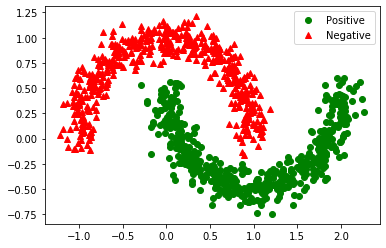

In [35]:
# Let's take a peek at the dataset:
import matplotlib.pyplot as plt

plt.plot(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], 'go', label='Positive')
plt.plot(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], 'r^', label='Negative')
plt.legend()
plt.show()

In [36]:
# Add a bias feature
import numpy as np

X_moons_with_bias = np.c_[np.ones((m, 1)), X_moons]
y_moons_column_vector = y_moons.reshape(-1, 1)

In [37]:
# Let's split the dataset

test_ratio = 0.2
test_size = int(m * test_ratio)
X_train = X_moons_with_bias[:-test_size]
X_test = X_moons_with_bias[-test_size:]
y_train = y_moons_column_vector[:-test_size]
y_test = y_moons_column_vector[-test_size:]

In [38]:
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

In [39]:
# Let's build a model
n_inputs = 2 # The moons dataset have two features

X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n_inputs + 1, 1], -1.0, 1.0, seed=42), name="theta")
logits = tf.matmul(X, theta, name="logits")
y_proba = tf.sigmoid(logits)
loss = tf.losses.log_loss(y, y_proba)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [40]:
# Let's create the optimizer and tell it to minimize the loss:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [41]:
# Let's run the model:

init = tf.global_variables_initializer()

n_epochs = 1000
batch_size = 64
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val = loss.eval({X: X_batch, y: y_batch})
        if epoch % 100 == 0:
            print("Epoch:", epoch, "\tloss:", loss_val)
    
    y_proba_val = y_proba.eval(feed_dict={X: X_test, y: y_test})

Epoch: 0 	loss: 1.02737
Epoch: 100 	loss: 0.3102982
Epoch: 200 	loss: 0.27445376
Epoch: 300 	loss: 0.21232982
Epoch: 400 	loss: 0.23607779
Epoch: 500 	loss: 0.16002956
Epoch: 600 	loss: 0.3600346
Epoch: 700 	loss: 0.26147836
Epoch: 800 	loss: 0.25837082
Epoch: 900 	loss: 0.24153747


In [42]:
# Let's compute model's precision and recall

from sklearn.metrics import precision_score, recall_score

y_pred = (y_proba_val >= 0.5)
precision_score(y_test, y_pred)

0.8613861386138614

In [43]:
recall_score(y_test, y_pred)

0.8787878787878788

In [44]:
X_train_enhanced = np.c_[X_train,
                         np.square(X_train[:, 1]),
                         np.square(X_train[:, 2]),
                         X_train[:, 1] ** 3,
                         X_train[:, 2] ** 3]
X_test_enhanced = np.c_[X_test,
                        np.square(X_test[:, 1]),
                        np.square(X_test[:, 2]),
                        X_test[:, 1] ** 3,
                        X_test[:, 2] ** 3]

In [45]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [46]:
def logistic_regression(X, y, initializer=None, seed=42, learning_rate=0.01):
    n_inputs_including_bias = int(X.get_shape()[1])
    with tf.name_scope("logistic_regression"):
        with tf.name_scope("model"):
            if initializer is None:
                initializer = tf.random_uniform([n_inputs_including_bias, 1], -1.0, 1.0, seed=seed)
            theta = tf.Variable(initializer, name="theta")
            logits = tf.matmul(X, theta, name="logits")
            y_proba = tf.sigmoid(logits)
        with tf.name_scope("train"):
            loss = tf.losses.log_loss(y, y_proba, scope="loss")
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
            training_op = optimizer.minimize(loss)
            loss_summary = tf.summary.scalar('log_loss', loss)
        with tf.name_scope("init"):
            init = tf.global_variables_initializer()
        with tf.name_scope("save"):
            saver = tf.train.Saver()
    return y_proba, loss, training_op, loss_summary, init, saver

In [47]:
n_inputs = 2 + 4
logdir = log_dir("logreg")

X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(X, y)

file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [48]:
import os 

n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "./my_logreg_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_logreg_model"

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train_enhanced, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X: X_test_enhanced, y: y_test})
        file_writer.add_summary(summary_str, epoch)
        if epoch % 500 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))

    saver.save(sess, final_model_path)
    y_proba_val = y_proba.eval(feed_dict={X: X_test_enhanced, y: y_test})
    os.remove(checkpoint_epoch_path)

Epoch: 0 	Loss: 0.8140705
Epoch: 500 	Loss: 0.17466179
Epoch: 1000 	Loss: 0.1261965
Epoch: 1500 	Loss: 0.10195139
Epoch: 2000 	Loss: 0.08693672
Epoch: 2500 	Loss: 0.076758385
Epoch: 3000 	Loss: 0.06931684
Epoch: 3500 	Loss: 0.06367952
Epoch: 4000 	Loss: 0.0591808
Epoch: 4500 	Loss: 0.05553648
Epoch: 5000 	Loss: 0.052499924
Epoch: 5500 	Loss: 0.049958106
Epoch: 6000 	Loss: 0.04776357
Epoch: 6500 	Loss: 0.04585248
Epoch: 7000 	Loss: 0.044185482
Epoch: 7500 	Loss: 0.042698577
Epoch: 8000 	Loss: 0.041363414
Epoch: 8500 	Loss: 0.040174454
Epoch: 9000 	Loss: 0.039082114
Epoch: 9500 	Loss: 0.038097635
Epoch: 10000 	Loss: 0.037230458


In [49]:
y_pred = (y_proba_val >= 0.5)
precision_score(y_test, y_pred)

0.9797979797979798

In [50]:
recall_score(y_test, y_pred)

0.9797979797979798